AMAZON WEB SCRAPING

1.Displaying the scraped data

In [1]:
import requests
from bs4 import BeautifulSoup

# URL of Amazon bestsellers in books
URL = "https://www.amazon.in/gp/bestsellers/books"

# Headers to mimic a browser request
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:112.0) Gecko/20100101 Firefox/112.0",
    "Accept-Language": "en-US,en;q=0.9",
}

def scrape_amazon_books(url):
    response = requests.get(url, headers=HEADERS)
    if response.status_code != 200:
        print(f"Failed to fetch the webpage. Status code: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.content, "html.parser")
    books = []

    # Locate the book containers
    for item in soup.find_all("div", class_="zg-grid-general-faceout"):
        book = {}
        
        # Get the book title
        title = item.find("div", class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y")
        

        book["title"] = title.get_text(strip=True) if title else "Unknown Title"
        
        # Get the author
        author = item.find("div", class_="a-row a-size-small")
        book["author"] = author.get_text(strip=True) if author else "Unknown Author"
        
        # Get the rating
        rating = item.find("span", class_="a-icon-alt")
        book["rating"] = rating.get_text(strip=True) if rating else "No Rating"
        
        # Get the price
        price = item.find("span", class_="a-size-base a-color-price")
        book["price"] = price.get_text(strip=True) if price else "Price Not Listed"
        
        books.append(book)
    
    return books

# Scrape the data
books_data = scrape_amazon_books(URL)

# Display the scraped data
if books_data:
    for idx, book in enumerate(books_data, start=1):
        print(f"{idx}. Title: {book['title']}")
        print(f"   Author: {book['author']}")
        print(f"   Rating: {book['rating']}")
        print(f"   Price: {book['price']}")
        print("-" * 50)

1. Title: Educart PRAYAS CBSE Class 10 Chapterwise Most Important Qs (& PYQs) - Maths, Science, SST and English for February 2025 Boards
   Author: Prashant Kirad
   Rating: 4.6 out of 5 stars
   Price: ₹482.00
--------------------------------------------------
2. Title: Too Good to Be True : A smart, funny will-they-won’t-they romance by mostlysane
   Author: Prajakta Koli
   Rating: 4.6 out of 5 stars
   Price: ₹267.00
--------------------------------------------------
3. Title: My First Library: Boxset of 10 Board Books for Kids
   Author: Wonder House Books
   Rating: 4.5 out of 5 stars
   Price: ₹399.00
--------------------------------------------------
4. Title: Dopamine Detox : A Short Guide to Remove Distractions and Get Your Brain to Do Hard Things
   Author: Thibaut Meurisse
   Rating: 4.4 out of 5 stars
   Price: ₹199.00
--------------------------------------------------
5. Title: Atomic Habits
   Author: James Clear
   Rating: 4.6 out of 5 stars
   Price: ₹525.00
----------

2.Saving to data frame and csv

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL of Amazon bestsellers in books
URL = "https://www.amazon.in/gp/bestsellers/books"

# Headers to mimic a browser request
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:112.0) Gecko/20100101 Firefox/112.0",
    "Accept-Language": "en-US,en;q=0.9",
}

def scrape_amazon_books(url):
    response = requests.get(url, headers=HEADERS)
    if response.status_code != 200:
        print(f"Failed to fetch the webpage. Status code: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.content, "html.parser")
    books = []

    # Locate the book containers
    for item in soup.find_all("div", class_="zg-grid-general-faceout"):
        book = {}
        
        # Get the book title
        title = item.find("div", class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y")
        book["Title"] = title.get_text(strip=True) if title else "Unknown Title"
        
        # Get the author
        author = item.find("div", class_="a-row a-size-small")
        book["Author"] = author.get_text(strip=True) if author else "Unknown Author"
        
        # Get the rating
        rating = item.find("span", class_="a-icon-alt")
        book["Rating"] = rating.get_text(strip=True) if rating else "No Rating"
        
        # Get the price
        price = item.find("span", class_="a-size-base a-color-price")
        book["Price"] = price.get_text(strip=True) if price else "Price Not Listed"
        
        books.append(book)
    
    return books

# Scrape the data
books_data = scrape_amazon_books(URL)

# Save to DataFrame
if books_data:
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(books_data)
    
    # Convert Price to a numerical value (strip ₹ and commas)
    df['Price_num'] = df['Price'].replace({'₹': '', ',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')
    
    # Sort the DataFrame by price in descending order
    df_sorted = df.sort_values(by='Price_num', ascending=False)
    
    print(df)

    # Save the DataFrame to a CSV file
    csv_file = "amazon_bestseller_booksnow111.csv"
    df.to_csv(csv_file, index=False, encoding="utf-8")
    print(f"Data successfully saved to {csv_file}")


                                                Title  \
0   Educart PRAYAS CBSE Class 10 Chapterwise Most ...   
1   Too Good to Be True : A smart, funny will-they...   
2   My First Library: Boxset of 10 Board Books for...   
3   Dopamine Detox : A Short Guide to Remove Distr...   
4                                       Atomic Habits   
5   Oswaal CBSE 25 Combined Sample Question papers...   
6                          Amma Diarylo Konni Pageelu   
7   The Psychology of Money [Paperback] Morgan Housel   
8        Don't Believe Everything You Think (English)   
9   Educart PRAYAS CBSE Class 12 Chapterwise Most ...   
10  The Art of Being Alone: Loneliness Was My Cage...   
11  PW NTA NEET Rankers Test Series 2025 Verified ...   
12  My First Book of Patterns Pencil Control: Patt...   
13     Ikigai: Japanese secret to long and happy life   
14  Animals Tales From Panchtantra: Timeless Stori...   
15  The Satvic Revolution: 7 Life-Changing Habits ...   
16                             

Plotting top 10 highest priced books

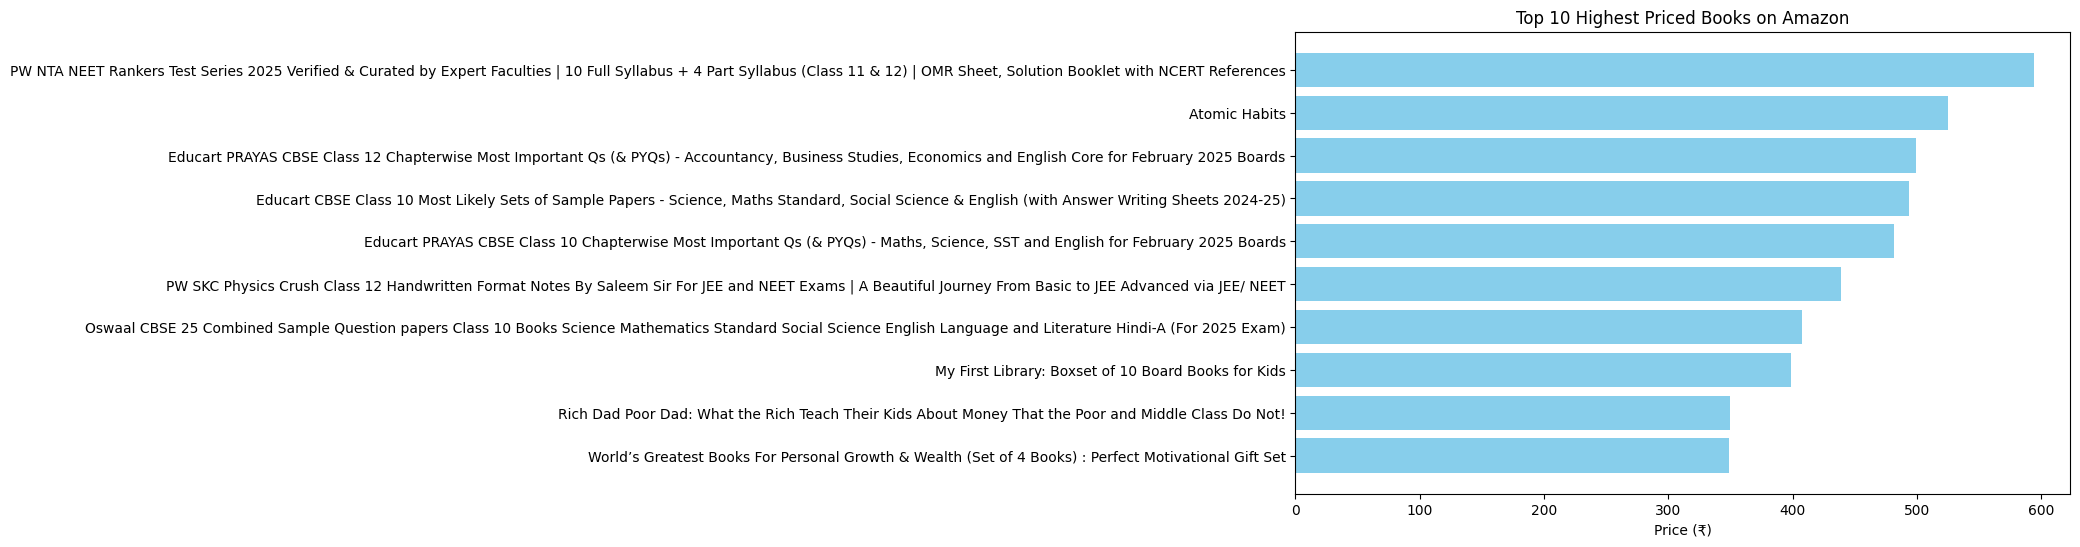

In [59]:
 
    # Select the top 10 books
    top_10_books = df_sorted.head(10)
    
    # Plot the prices of the top 10 highest-priced books
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_books['Title'], top_10_books['Price_num'], color='skyblue')
    plt.xlabel('Price (₹)')
    plt.title('Top 10 Highest Priced Books on Amazon')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest price at the top
    plt.show()
    

3.to filter authors with 1000+ ratings and sort by rating

In [69]:
# to filter authors with 1000+ ratings and sort by rating

# Check the first few rows of the DataFrame to ensure 'Num_Ratings' column exists
print(df.head())

# Convert 'Rating' to numeric (e.g., 4.5)
df['Rating_num'] = df['Rating'].str.extract('([0-9.]+)').astype(float)

# Convert 'Num_Ratings' to numeric (e.g., 5000)
df['Num_Ratings_num'] = df['Num_Ratings'].str.replace(r'[^\d]', '', regex=True).astype(int)

# Filter out authors with fewer than 1000 ratings
df_filtered = df[df['Num_Ratings_num'] >= 1000]

# Sort the DataFrame by rating in descending order
df_filtered_sorted = df_filtered.sort_values(by='Rating_num', ascending=False)

# Display the filtered and sorted DataFrame
print(df_filtered_sorted[['Title', 'Author', 'Rating', 'Num_Ratings', 'Price']])



                                               Title              Author  \
0  Educart PRAYAS CBSE Class 10 Chapterwise Most ...      Prashant Kirad   
1  Too Good to Be True : A smart, funny will-they...       Prajakta Koli   
2  My First Library: Boxset of 10 Board Books for...  Wonder House Books   
3  Dopamine Detox : A Short Guide to Remove Distr...    Thibaut Meurisse   
4                                      Atomic Habits         James Clear   

               Rating    Price Num_Ratings  Rating_num  Num_Ratings_num  
0  4.6 out of 5 stars  ₹482.00     ₹482.00         4.6            48200  
1  4.6 out of 5 stars  ₹267.00     ₹267.00         4.6            26700  
2  4.5 out of 5 stars  ₹399.00     ₹399.00         4.5            39900  
3  4.4 out of 5 stars  ₹199.00     ₹199.00         4.4            19900  
4  4.6 out of 5 stars  ₹525.00     ₹525.00         4.6            52500  
                                                Title  \
19                         Can We Be Stran

4.Plot for top 10 rated books

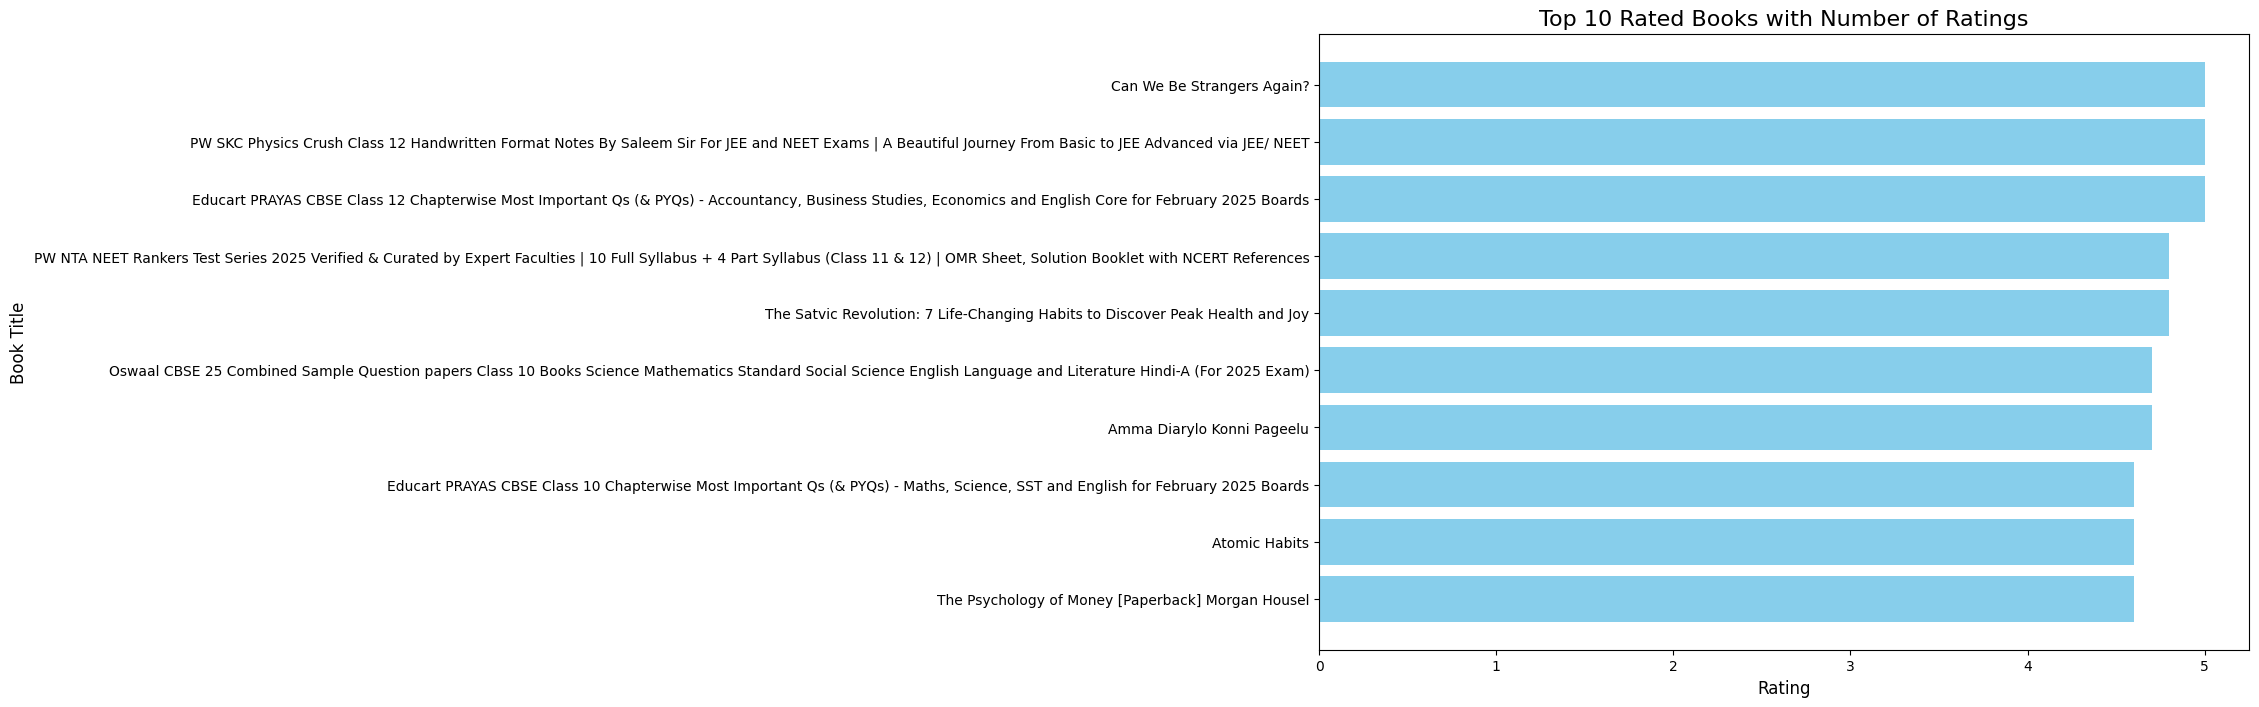

In [71]:
import matplotlib.pyplot as plt

# Select top 10 books for the bar plot
top_books = df_filtered_sorted.head(10)

# Plot the bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_books['Title'], top_books['Rating_num'], color='skyblue')

# Adding titles and labels
plt.title('Top 10 Rated Books with Number of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Book Title', fontsize=12)

# Show the plot
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rating at the top
plt.show()

